<a href="https://colab.research.google.com/github/nerophung/neu-ai-class-winter-2019/blob/master/fashion_mnist_lenet_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practice LeNet with Fashion MNIST Dataset**


#### Import lib 

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AvgPool2D
from keras.callbacks import ModelCheckpoint

#### Download data

In [52]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


#### Visualize data

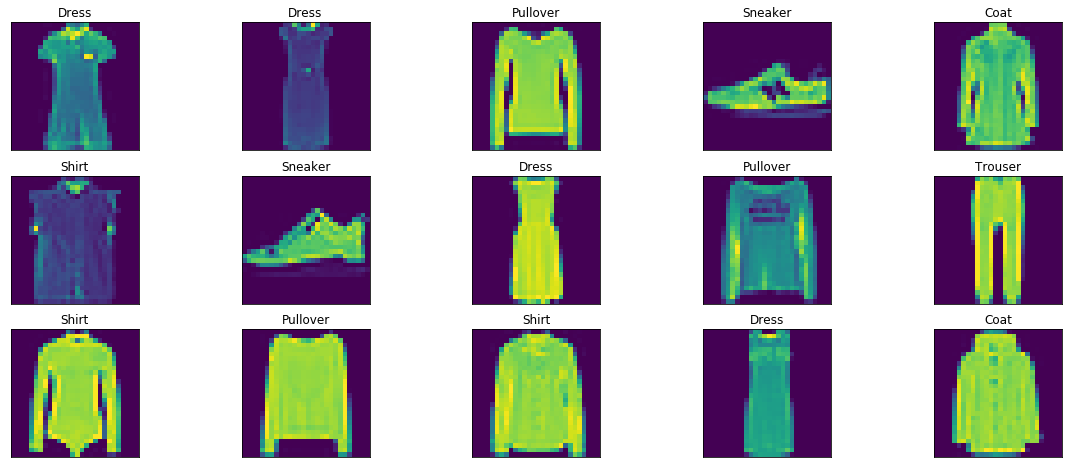

In [53]:
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_train.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_train[index].reshape(28, 28)))
    # Set the title for each image
    ax.set_title("{}".format(fashion_mnist_labels[y_train[index]]))

## Data normalization

In [54]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


## Split the data into train/validation/test data sets


In [55]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


## Create the model architecture

In [56]:
def LeNet5():
  model = Sequential()
  model.add(Conv2D(6, kernel_size=(5, 5), activation='sigmoid', input_shape=(28, 28, 1)))
  model.add(AvgPool2D(pool_size=2, strides=2))
  model.add(Conv2D(16, kernel_size=(5, 5), activation='sigmoid'))
  model.add(AvgPool2D(pool_size=2, strides=2))
  model.add(Flatten())
  model.add(Dense(120, activation='sigmoid'))
  model.add(Dense(84, activation='sigmoid'))
  model.add(Dense(10, activation='softmax'))

  # Summary model
  model.summary()

  return model
  
model = LeNet5()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_2 (Dense)              (None, 84)           

## Compile the model


In [57]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Train the model


In [58]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 55000 samples, validate on 5000 samples
Epoch 1/10





55000/55000 [==============================] - 22s 406us/step - loss: 1.1806 - acc: 0.5675 - val_loss: 0.7534 - val_acc: 0.7212

Epoch 00001: val_loss improved from inf to 0.75340, saving model to model.weights.best.hdf5
Epoch 2/10
55000/55000 [==============================] - 22s 395us/step - loss: 0.7029 - acc: 0.7281 - val_loss: 0.6325 - val_acc: 0.7606

Epoch 00002: val_loss improved from 0.75340 to 0.63251, saving model to model.weights.best.hdf5
Epoch 3/10
55000/55000 [==============================] - 22s 398us/step - loss: 0.6198 - acc: 0.7566 - val_loss: 0.5769 - val_acc: 0.7752

Epoch 00003: val_loss improved from 0.63251 to 0.57694, saving model to model.weights.best.hdf5
Epoch 4/10
55000/55000 [==============================] - 23s 411us/step - loss: 0.5673 - acc: 0.7797 - val_loss: 0.5349 - val_acc: 0.7948

Epoch

## Test Accuracy

In [59]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8327


## Visualize prediction

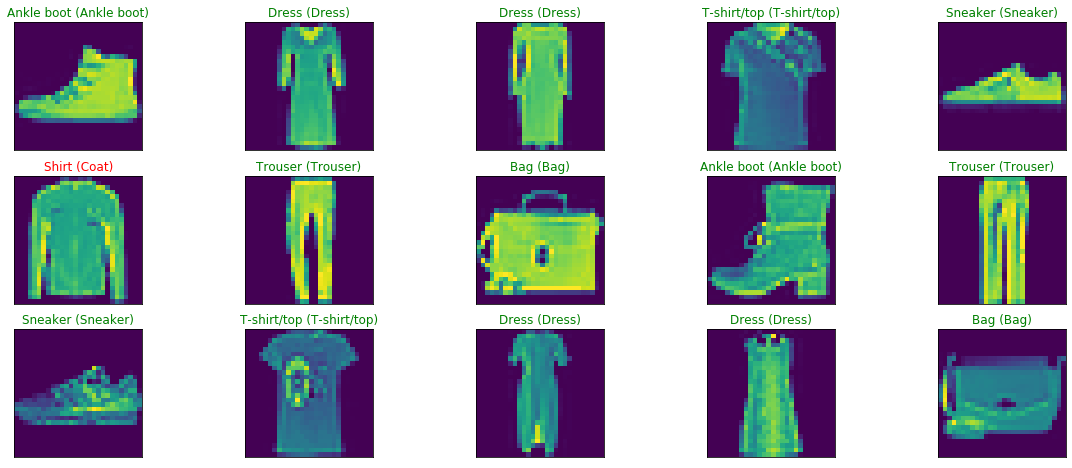

In [60]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))